<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_cd.png">

# Proyecto de Machine Learning:  Prediccion de precios de casas

	
Pasos principales que deberá seguir:


1. Mira el panorama general y entienda el problema.
* Obtenga los datos.
* Descubra y visualice los datos para obtener información.
* Prepare los datos para los algoritmos de Machine Learning.
* Seleccione un modelo y realice el entrenamiento (train).
* Afina(fine tune) el modelo.
* Presente su solución.
* Inicie (Launch), monitoree y mantenga su sistema

[Documento extendido](https://bit.ly/2Sqtfhl)

## 1. Mira el panorama general y entiende el problema

<br><br><center><h1 style="font-size:2em;color:#2467C0">Caso de estudio:  Predicción de precios de casas California (EE.UU) </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/real_state.jpg" align="middle" style="width:550px;"/></td>
<td>

Para este proyecto suponga que es un científico de datos recientemente contratado en una empresa de bienes raíces
    
La primera tarea que debe realizar es crear un modelo de precios de la vivienda en California utilizando los datos del censo de California. Estos datos tienen métricas como la población, el ingreso medio, el precio medio de la vivienda, etc. para cada grupo de bloques en California.
    
    
Los grupos de bloques son la unidad geográfica más pequeña para la cual la Oficina del Censo de los Estados Unidos publica datos de muestra (un grupo de bloques generalmente tiene una población de 600 a 3,000 personas). Simplemente los llamaremos "distritos" para abreviar.
    
    
Su modelo debe aprender de estos datos y poder predecir el precio medio de la vivienda en cualquier distrito, dadas todas las otras métricas
   
<br>
</td>
</tr>
</table>

<div class="alert alert-info">
<b> </b>:

 <ul>
  <li> ¿Cuál es exactamente el objetivo comercial? </li>
  <li> ¿Será la construcción de un modelo? </li>
 <li> ¿Cómo espera la compañía usar y beneficiarse de este modelo? </li>
</ul>
    
R = Su jefe responde que su modelo, una predicción del precio medio de la vivienda de un distrito,  se enviará a otro sistema de Aprendizaje Automático , el cual junto con muchas otros parametros determinará si vale la pena invertir en un área determinada o no. Hacer esto bien es fundamental, ya que afecta directamente los ingresos.
 
<img src="figuras/real_state_diagram.jpg" align="middle" style="width:650px;" />
  <center> <strong><figcaption> Figura: Pipeline del problema</figcaption></center> </strong>
    
 <ul>
  <li> ¿Cómo es la solución actual? </li>
</ul>
R= Actualmente hay expertos en la empresa que estiman manualmente los precios de las viviendas del distrito y utilizan reglas complejas para obtener una estimación. Esto es costoso y requiere mucho tiempo, y sus estimaciones no son muy buenas; su tasa de error típica es de aproximadamente el 20%. Por esta razón la empresa considera que podría ser útil tener un modelo para predecir el precio medio de las casas de los diferentes distritos que se encuentran en los datos del censo, así como otros datos de importancia. 
</div>

<div class="alert alert-info">

<ul>
  <li> ¿Cuál será un buen parametro de medición del performance? </li>
</ul>

Se tienen los siguientes:
    
1. Root Mean Square Error (RMSE)
\begin{equation*}
\textrm{RMSE} ( \mathbf{X} ,h) = \sqrt{ \frac{1}{m}\sum_{i=1}^{m} (h( \mathbf{x}^{(i)} - y^{(i)}))^2}
\end{equation*}
     
2. Mean Absolute Error (MAE)
\begin{equation*}
\textrm{MAE} ( \mathbf{X} ,h) =  \frac{1}{m}\sum_{i=1}^{m} \bigg| h(\mathbf{x}^{(i)}) - y^{(i)} \bigg|
\end{equation*}

Ambas ecuaciones introducen varios parametros comunes utilizados en problemas de Machine Learning que se estarán utilizando.

<ul>
  <li> $m$ es el numero de instancias, por ejemplo para una muestra de 2000 distritos, $m=2000$ </li>
</ul>

<ul>
  <li> $\mathbf{x}^{(i)}$ es el vector que contiene todas las caracteristicas  de cada una de la instancias ($i$), y $y^{(i)}$ es el valor de nuestro parámetro de interés (etiqueta).  </li>
</ul>
    
    
Por ejemplo, si el primer distrito en el conjunto de datos se encuentra en la longitud –118.29°, latitud 33.91°, y tiene 1,416 habitantes con un ingreso promedio de 38,372 USD, y el valor promedio de la casa es 156,400 USD, entonces:

\begin{equation*}
\mathbf{x}^{(1)}
=
\begin{pmatrix}
–118.29 \\
33.91 \\
1,416 \\
38,372 
\end{pmatrix}
\end{equation*}

\begin{equation*}
y^{(1)} = 156,400
\end{equation*}    
    
<ul>
  <li> $ \mathbf{X} $ Es la matriz que contiene todos los valores de las instancias en el dataset(muestra). Los valores de cada instancia se sitúan en las filas de la matriz. </li>
</ul>    

\begin{equation*}
\mathbf{X} 
=
\begin{pmatrix}
(\mathbf{x}^{(1)})^\top \\
(\mathbf{x}^{(2)})^\top\\
 \vdots \\
(\mathbf{x}^{(1999)})^\top \\
(\mathbf{x}^{(2000)})^\top
\end{pmatrix}
=
\begin{pmatrix}
–118.29  & 33.91 &  1,416 & 38,372      \\
\vdots  & \vdots &  \vdots & \vdots   
\end{pmatrix}
\end{equation*}

<ul>
  <li> $ h $ es la función de predicción de su sistema, también llamada hipótesis. Cuando el sistema recibe el vector de características $\mathbf{x}^{(i)}$  de una instancia, genera un valor de prediccion $\hat{y}^{(i)} = h (\mathbf{x}^{(i)})$ para esa instancia ($\hat{y}$ se pronuncia "y-sombrero o hat").. </li> 
Por ejemplo, si el sistema predice que el precio medio de la vivienda en el primer distrito es de 158,400USD , entonces $\hat{y}^{(1)} = h (\mathbf{x}^{(1)})$ = 158,400.
</ul>   



NOTA: Usaremos letras cursiva en minúscula para valores escalares (como $m$ o $y^{(i)}$) y nombres de funciones (como $h$),  letras en negritas en minúscula para vectores (como $\mathbf{x}^{(i)}$) y fuente en negrita en mayúscula para matrices (como $\mathbf{X}$)

</div>

## 2. Obtenga los datos

In [4]:
#Librerias principales
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
#Cargar el archivo "datos/info_Casas_SF.csv"
datos = pd.read_csv('datos/info_Casas_SF.csv')


## 3. Descubra y visualice los datos para obtener información.


In [6]:
# Mostrar los primeras filas
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
#Información general 
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20635.000000,20635.000000,20635.000000,20635.000000,20428.000000,20635.000000,20635.000000,20635.000000,20635.000000
mean,-119.569999,35.632412,28.636152,2636.020208,537.899305,1425.660286,499.593700,3.870944,206813.756288
std,2.003685,2.135918,12.583924,2181.794772,421.425970,1132.530137,382.357072,1.899961,115372.499511
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,296.000000,787.000000,280.000000,2.563100,119600.000000
50%,-118.500000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.535200,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743700,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
# Mostrar el número de filas y columnas
datos.shape


(20635, 10)

In [9]:
# Mostrar el tipo de variables
datos.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [10]:
#Agregar 2 nuevas variables
datos['population_per_households'] = datos['population'] / datos['households']
datos['total_rooms_per_households'] = datos['total_rooms'] / datos['households']
datos.dtypes


longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity                object
population_per_households     float64
total_rooms_per_households    float64
dtype: object

In [11]:
# Valores de la viable categorica  ocean_proximity
datos['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64

<Axes: >

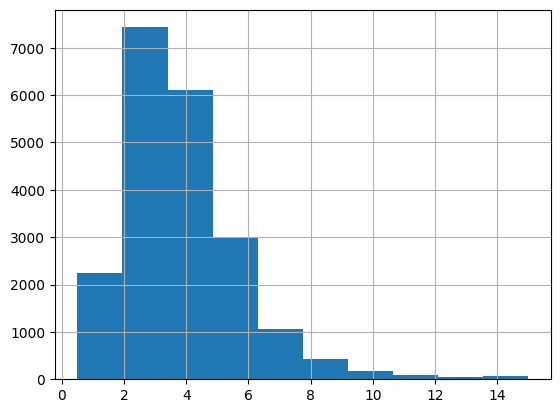

In [12]:
# Graficar el promedio de ingresos
datos['median_income'].hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'population_per_households'}>,
        <Axes: title={'center': 'total_rooms_per_households'}>, <Axes: >]],
      dtype=object)

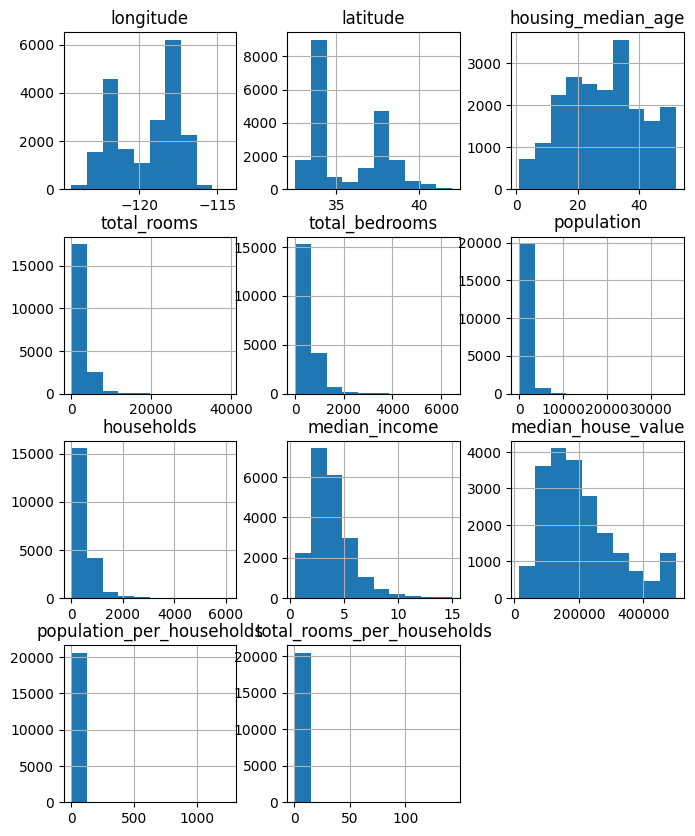

In [13]:
#Graficar todas las variables numericas 
datos.hist(figsize=(8,10))

<Axes: xlabel='longitude', ylabel='latitude'>

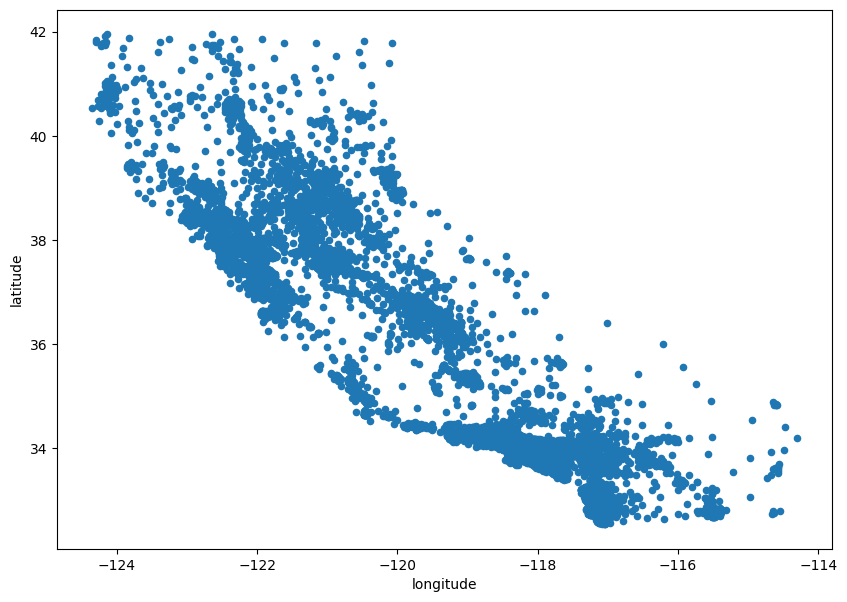

In [14]:
datos.plot.scatter(x='longitude',
                    y='latitude',
                    figsize=(10, 7))

#### Mapa de California

<img src="figuras/CaliforniaMapa.png" align="middle" style="width:550px;" />

### Mapa de California (Sin Folium)

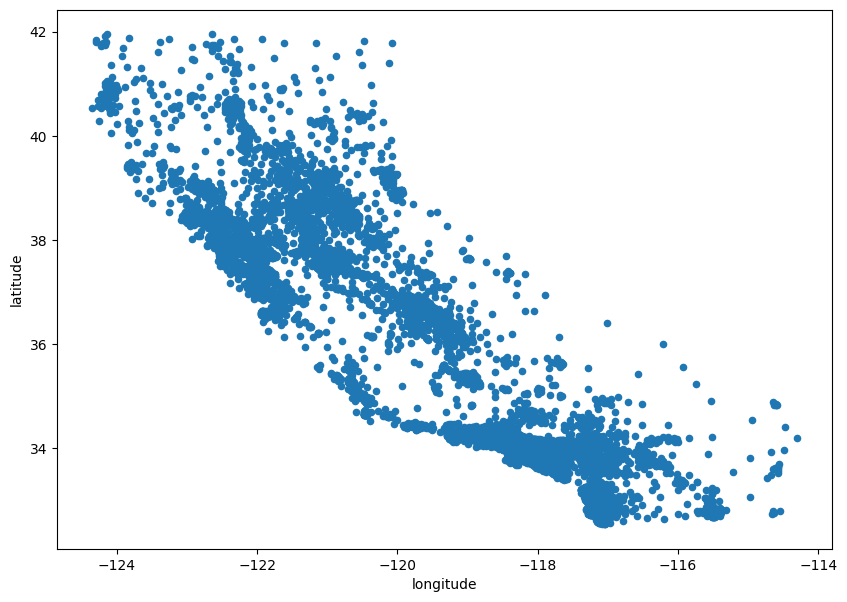

In [15]:
# Hacer una grafica de dispersión con la longitud en X y la latitud en Y.
datos.plot.scatter(x='longitude',
                y='latitude',
                figsize=(10, 7));

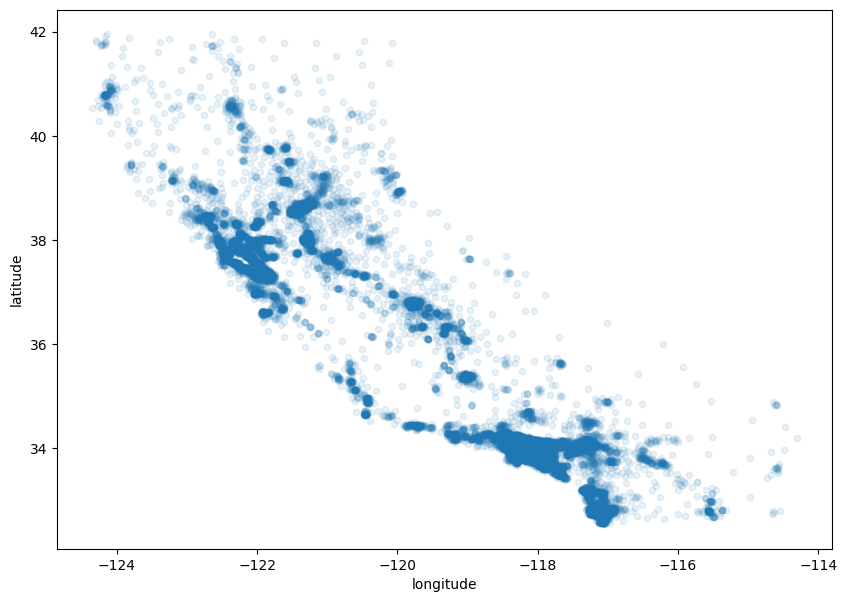

In [16]:
#Agregar alpha=0.1
datos.plot.scatter(x='longitude',
                y='latitude',
                figsize=(10, 7),
                alpha=0.1);

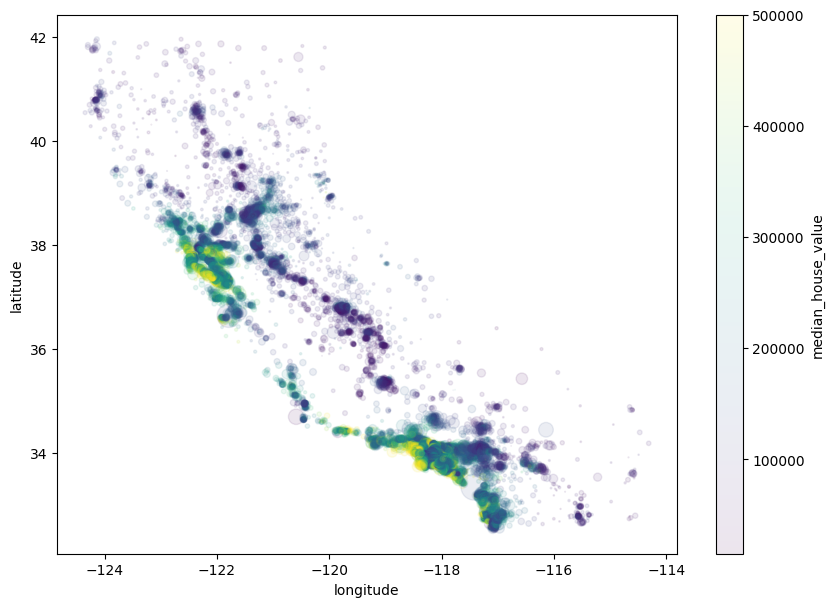

In [17]:
#Cambiar el tamaño del punto y agregar una escala de medición
#s : Tamaño de cada punto
#c : Etiqueta
datos.plot.scatter(x='longitude', y='latitude', figsize=(10, 7),
                alpha=0.1, s=datos.population / 100 ,
                c='median_house_value', colorbar=True);

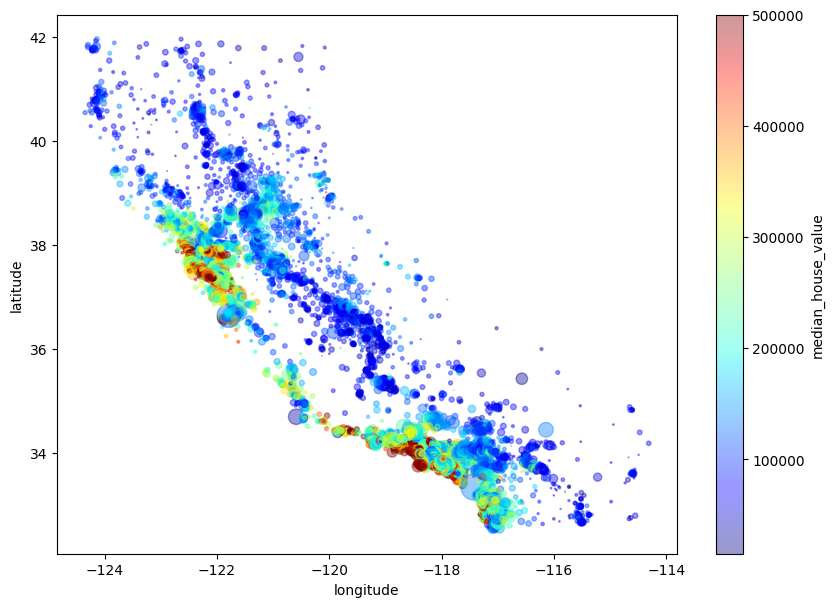

In [18]:
#pip install colorspacious
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
datos.plot.scatter(x='longitude', y='latitude', figsize=(10, 7),
                alpha=0.4,
                s=datos.population / 100,
                c='median_house_value',
                cmap=plt.get_cmap('jet'),
                colorbar=True);

### Mapa de California (Con Folium)

In [19]:
#pip install folium
import folium
mapa = folium.Map(location=[37.50,-122.2], zoom_start=6)
mapa

In [20]:
#Hacer un arreglo llamado 'distritos_loc' que contenga solo la informacion de las coordenadas latitud y longitud
distritos = datos[['latitude', 'longitude']].to_numpy()
distritos

array([[  37.88, -122.23],
       [  37.86, -122.22],
       [  37.85, -122.24],
       ...,
       [  39.43, -121.22],
       [  39.43, -121.32],
       [  39.37, -121.24]])

In [21]:
from folium import plugins
from folium.plugins import HeatMap

HeatMap(distritos, radius= 15, max_val = 0.1, min_opacity=0.4).add_to(mapa)
mapa

C:\Users\perez\AppData\Local\Temp\ipykernel_34936\3077061554.py:4: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(distritos, radius= 15, max_val = 0.1, min_opacity=0.4).add_to(mapa)


### Correlación de variables

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='population_per_households', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms_per_households', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='population_per_households', ylabel='median_income'>,
        <Axes: xlabel='total_rooms_per_households', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
     

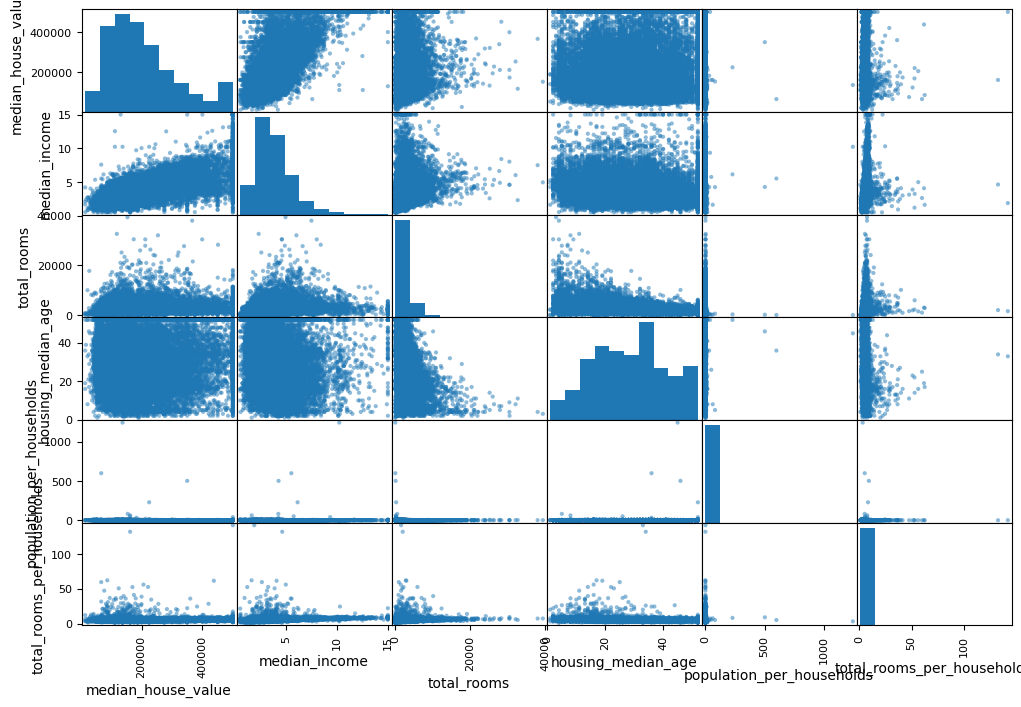

In [22]:
#Hacer diagramas de correlación
# Definir una lista llamada atributos  con las siguientes variables : 
# "median_house_value", "median_income", "total_rooms","housing_median_age"
from pandas.plotting import scatter_matrix

atributos=["median_house_value", "median_income", "total_rooms", "housing_median_age", "population_per_households",
           "total_rooms_per_households"]
scatter_matrix(datos[atributos],figsize=(12,8))

In [23]:
# Definir una nueva columna llamada 'bed_rooms_per_room' y asignarle el valor de la division de
# la variables total_bedrooms con total_rooms
datos['bed_rooms_per_rooms'] = datos['total_bedrooms'] / datos['total_rooms']
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,population_per_households,total_rooms_per_households,bed_rooms_per_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.555556,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.109842,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.802260,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.547945,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.181467,6.281853,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20630,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.560606,5.045455,0.224625
20631,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,3.122807,6.114035,0.215208
20632,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.325635,5.205543,0.215173
20633,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.123209,5.329513,0.219892


In [24]:
atributos=["median_house_value",
           "median_income",
           "bed_rooms_per_rooms",
           "total_rooms",
           "housing_median_age",
           "population_per_households",
           "total_rooms_per_households"]
atributos

['median_house_value',
 'median_income',
 'bed_rooms_per_rooms',
 'total_rooms',
 'housing_median_age',
 'population_per_households',
 'total_rooms_per_households']

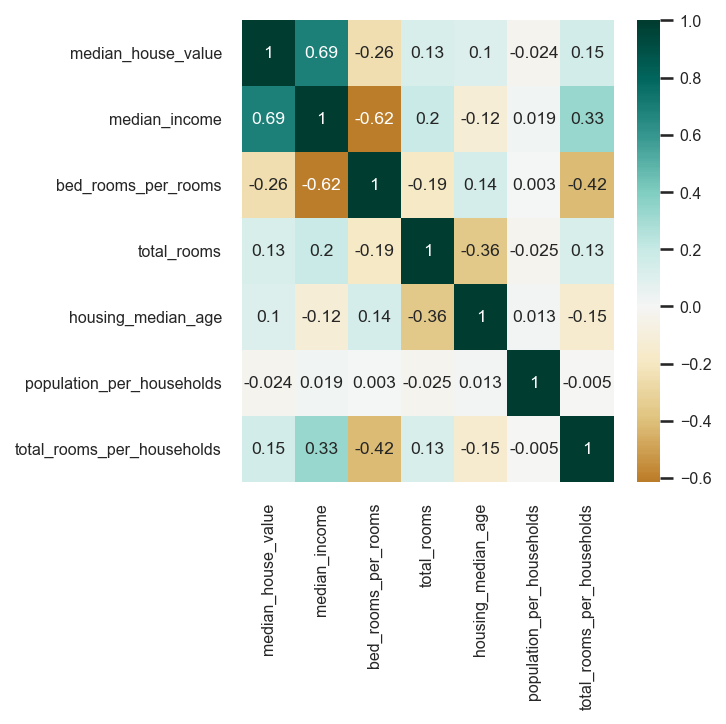

In [25]:
# Matriz correlación númerica y visual
#https://matplotlib.org/tutorials/colors/colormaps.html
#Instalación de seaborn
#pip install seaborn
import seaborn as sns
plt.figure(figsize=(4,4),  dpi = 150)
corrMatrix = datos[atributos].corr().round(3)
sns.set( font_scale= 0.7 )
sns.heatmap( corrMatrix, annot = True , cmap = 'BrBG', center=0 )
plt.xticks(rotation = 90)
plt.show()

#dos tipos de correlación, correlación positiva (1, aumenta) y correlación negativa (-1,disminuye)


## 4. Prepare los datos y sus transformadores 

In [26]:
#Revisar si hay datos perdidos NaN
datos.isnull().any().any()

True

In [27]:
#Número de filas
len(datos)

20635

In [28]:
# eliminar datos  perdidos NaN
datos.dropna(inplace=True)

**Tipos de variables**

<img src="figuras/categarical_variables.jpg" align="middle" style="width:550px;" />

In [29]:
# Revisar nuevamente la columna 'ocean_proximity'
datos['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
Name: count, dtype: int64

In [30]:
#Importamos la funcion OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
nominal_codificador = OneHotEncoder(sparse_output=False)
nominal_codificador.fit_transform(datos.ocean_proximity.to_frame())

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [31]:
nominal_codificador.categories_

[array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

In [32]:
## Ejemplo codificacion Ordinal
#from sklearn.preprocessing import OrdinalEncoder
#O_codificador = OrdinalEncoder()
#O_codificadir.fit_transform(df[["ocean_proximity"]])
#O_codificadir.categories_



###  ColumnTransformer  y pipeline

<img src="figuras/pipeline.jpg" align="middle" style="width:500px;" />

#### Pipeline

La función pipeline permite juntar varios trasformaciones secuenciales que se requieren ejecutar a un conjunto de datos.

**Pipeline(steps=[('titulo trasnformación1', trasnformación1), ('titulo trasnformación2', trasnformación2),...])**




In [33]:
#Modulos importantes
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [34]:
# Crear la lista de  viriables numericas y categoricas
# Númericas: 'median_income', 'total_rooms','housing_median_age','bed_rooms_per_room'
# Categoricas: 'ocean_proximity'
numeric_list = ['median_income', 'total_rooms', 'housing_median_age', 'bed_rooms_per_rooms', "population_per_households",
           "total_rooms_per_households"]
categorical_list= ['ocean_proximity']


In [35]:
# Crear el pipeline de preprocesamiento para datos numéricos y categóricos.
numeric_transformer = Pipeline( steps=[ ('scaler', StandardScaler())]) #Normaliza las varibales
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder())]) #vectoriza las variables categoricas


#### ColumnTransformer


ColumnTransformer es una clase de scikit-learn que  permite aplicar transformaciones de preparación de datos de forma selectiva.

Por ejemplo,  permite aplicar una transformación específica o secuencia de transformaciones solo a las columnas numéricas, y una secuencia separada de transformaciones solo a las columnas categóricas.

Para usar ColumnTransformer, debe especificar una lista de transformadores.

Cada transformador es una tupla de tres elementos que define el nombre del transformador, la transformación a aplicar y los índices de columna a los que aplicar. Por ejemplo: **(Nombre, objeto, columnas)**

In [36]:
# Definir los transformadores
transformer = ColumnTransformer([('num', numeric_transformer, numeric_list),
                                ('cat', categorical_transformer, categorical_list)])

In [37]:
#Tener presente este orden numerico + categotico


### Preparando las muestras de entrenamiento y prueba

<img  align="middle" style="width:550px;" src="figuras/ml_diagrama3.jpg">


División general de los datos
* **X**: Datos  sin la columna "median_house_value""
* **y**: Datos con la columna "median_house_value"

Muestras de entrenamiento y prueba
* **X_train**: este será el grupo de entrenamiento
* **X_test**: este será el  grupo de prueba
* **y_train**: este será el target para el grupo de entrenamiento
* **y_test**: este será el target para el grupo de prueba


In [38]:
# Crear X (Quitar la columna o campo de "median_house_value")
X = datos.drop('median_house_value', axis = 1)


In [39]:
# Crear y (Valor de de la columna "median_house_value")
Y = datos['median_house_value']

In [40]:
# Dividir los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size= 0.75) # 75% de datos para el entrenamiento

In [41]:
# Revise  el tamaño de cada muestra
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((15321, 12), (5107, 12), (15321,), (5107,))

## 5.  Seleccione algunos modelos y realice el entrenamiento (train).


In [42]:
# Llamamos al modelo lineal
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()


In [43]:
# Pipeline de la predicción completa.
model_linear_regression = Pipeline([('transformer', transformer), ('linear_regression', linear_regression)])

In [44]:
model_linear_regression.fit(X_train,Y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_rooms',
                                                   'population_per_households',
                                                   'total_rooms_per_households']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('linear_regression', LinearRegression())])

In [45]:
#Probamos en unas pocas instancias 
muestra_datos = X_test.iloc[:6]
model_linear_regression.predict(muestra_datos)

array([223497.4745976 , 173209.91857165, 114364.74163681, 250361.68406105,
       277254.19166001, 246985.32945895])

In [46]:
#Comparamos con los valores reales
list(Y_test.iloc[:6])

[159900.0, 161600.0, 101600.0, 382100.0, 373400.0, 299200.0]

#### Cross validation


from sklearn.model_selection import cross_val_score

La validación cruzada o  cross validation  (CV) es una de las técnicas utilizadas para probar la efectividad de los modelos de Machine Learning, también es un procedimiento de remuestreo utilizado para evaluar un modelo si tenemos datos limitados. 

Una manera de obtener las muestras es a traves del metodo del k-fold, el cual divide a los datos en k muestras como se muestra en la imagen (ejemplo con k=5) 

<img src="figuras/cross_validation.jpg" align="middle" style="width:550px;" />
   


In [47]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score
#https://github.com/scikit-learn/scikit-learn/issues/2439

#### Evaluación Linear Regression

In [48]:
# Evaluadar el modelo usando crossvalidation
#https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.model_selection import cross_val_score
linear_scores = cross_val_score(model_linear_regression,X,Y,
                     scoring = 'neg_mean_squared_error', cv = 10)
linear_scores

array([-7.61230134e+09, -3.59405716e+09, -8.38926029e+09, -4.93502649e+09,
       -7.20657979e+09, -4.89989919e+09, -3.01588354e+09, -8.59278266e+09,
       -6.98095835e+09, -3.01840850e+09])

In [49]:
# Cambiamos el signo y sacamos la raiz
linear_rmse_scores = np.sqrt(-linear_scores)
linear_rmse_scores

array([87248.50336292, 59950.45586698, 91592.90521749, 70249.74372573,
       84891.57666402, 69999.27994915, 54917.06051054, 92697.26350104,
       83552.12952745, 54940.04457624])

In [50]:
#Definimos una función que nos devuelva el score, mean y standard deviation
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [51]:
display_scores(linear_rmse_scores)

Scores: [87248.50336292 59950.45586698 91592.90521749 70249.74372573
 84891.57666402 69999.27994915 54917.06051054 92697.26350104
 83552.12952745 54940.04457624]
Mean: 75003.89629015664
Standard deviation: 14104.29975081224


### DecisionTree

In [52]:
#Aplicar el modelo de arboles de decision con DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#1. Nombrar una variable para nuestro modelo
tree_reg = DecisionTreeRegressor (random_state=42)


In [53]:
#2. Definir el Pipeline : Transformación  + modelo

model_tree_reg = Pipeline(steps=[('transformer', transformer), ('tree_reg', tree_reg)])

In [54]:

#3. Ajustar el modelo
model_tree_reg.fit(X_train, Y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_rooms',
                                                   'population_per_households',
                                                   'total_rooms_per_households']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('tree_reg', DecisionTreeRegressor(random_state=42))])

In [55]:
#Evaluacion
# 4. Calcular el score con la validación cruzada CV=10
tree_reg_scores = cross_val_score(model_tree_reg, X, Y, scoring = 'neg_mean_squared_error', cv = 10 )
tree_reg_scores

array([-1.09381139e+10, -4.98463757e+09, -8.68408223e+09, -6.57797036e+09,
       -7.99488428e+09, -6.81904278e+09, -5.05919421e+09, -1.10556527e+10,
       -9.91249445e+09, -5.79838448e+09])

In [56]:

# 5. Realizar el cambio de signo y sacar la raiz
tree_rmse_scores = np.sqrt(-tree_reg_scores)
tree_rmse_scores

array([104585.43849473,  70601.96578503,  93188.42325549,  81104.68762894,
        89414.11678176,  82577.49562865,  71128.01280091, 105145.86373914,
        99561.51086207,  76147.12390859])

In [57]:

# 6. Mostrar el resultado usando la funcion display_scores
display_scores(tree_rmse_scores)

Scores: [104585.43849473  70601.96578503  93188.42325549  81104.68762894
  89414.11678176  82577.49562865  71128.01280091 105145.86373914
  99561.51086207  76147.12390859]
Mean: 87345.4638885321
Standard deviation: 12378.03028901361


### RandomForest

In [58]:
#Aplicar el modelo RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [59]:
#1. Nombrar una variable para nuestro modelo
forest_reg = RandomForestRegressor(n_estimators= 10, random_state= 42 )

In [60]:
#2. Definir el Pipeline : Transformación  + modelo
model_forest_reg = Pipeline(steps=[('transformer', transformer), ('forest_reg', forest_reg)])

In [61]:
#3. Ajustar el modelo
model_forest_reg.fit(X_train, Y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_rooms',
                                                   'population_per_households',
                                                   'total_rooms_per_households']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('forest_reg',
                 RandomForestRegressor(n_estimators=10, random_state=42))])

In [62]:
#Evaluacion
# 4. Calcular el score con la validación cruzada CV=10
forest_reg_scores = cross_val_score(model_forest_reg, X, Y,
                                    scoring = 'neg_mean_squared_error', cv = 10)

In [63]:
# 5. Realizar el cambio de signo y sacar la raiz
forest_rmse_score = np.sqrt(-forest_reg_scores)

In [64]:
# 6. Mostrar el resultado usando la funcion display_scores
display_scores(forest_rmse_score)

Scores: [76919.08756305 53661.25954183 73559.62739148 64716.4385178
 67213.07692026 65500.22478488 51614.0561607  86582.97950399
 77397.3345136  54896.44478577]
Mean: 67206.0529683356
Standard deviation: 10960.131280032696


#### Resumen

| Modelo o clasificador   |  Mean | Standard deviation  |
|---|---|---|
|  Linear Regression  |  75003.89  |  14104.29     |
|   DecisionTree |  87345.46   | 12378.03       |
|  Random Forest   |67206.05   |   10960.13      |


## 6 .  Afina(fine tune) el modelo RandomForest


In [65]:
# Utilizamos la función GridSearchCV para encontrar los valores optimos
from sklearn.model_selection import GridSearchCV


In [66]:
#Definición de posibles parametros
n_estimators=[3, 10, 30,50,80,100]
min_samples_split=[2,4,6,8]
max_depth=[2,4,6,8,10]

params = {'forest_reg__n_estimators': n_estimators, 
        'forest_reg__min_samples_split': min_samples_split,
        'forest_reg__max_depth': max_depth}
print(params)

{'forest_reg__n_estimators': [3, 10, 30, 50, 80, 100], 'forest_reg__min_samples_split': [2, 4, 6, 8], 'forest_reg__max_depth': [2, 4, 6, 8, 10]}


In [67]:
#Definicion del grid de busqueda
grid = GridSearchCV(model_forest_reg, param_grid= params, 
                    cv = 5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1 , verbose = 2)

In [68]:
# Ajuste del modelo usando todas las posibles combinaciones de parametros 
grid.fit(X,Y)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['median_income',
                                                                          'total_rooms',
                                                                          'housing_median_age',
                                                                          'bed_rooms_per_rooms',
                                                                          'population_per_households',
                                                                          'total_rooms_per_households']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['ocean_proximity'])])),
                                       ('forest_reg',
                                        RandomForestRegressor(n_estimators=10,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'forest_reg__max_depth': [2, 4, 6, 8, 10],
                         'forest_reg__min_samples_split': [2, 4, 6, 8],
                         'forest_reg__n_estimators': [3, 10, 30, 50, 80, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [69]:
# Mostrar la mejor combinación
grid.best_params_

{'forest_reg__max_depth': 8,
 'forest_reg__min_samples_split': 8,
 'forest_reg__n_estimators': 100}

**Encontramos los nuevos valores de la media y desviación estándar**


In [70]:
#1 Ajustar el modelo con los nuevos parametros 
forest_reg = RandomForestRegressor(random_state= 42,
                                max_depth = 8,
                                min_samples_split = 8,
                                n_estimators = 100)

In [71]:
#2. Definir el Pipeline : Transformación  + modelo
model_forest_reg = Pipeline(steps=[('transformer', transformer), ('forest_reg', forest_reg)])

In [72]:
#3. Ajustar el modelo
model_forest_reg.fit(X_train, Y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_rooms',
                                                   'population_per_households',
                                                   'total_rooms_per_households']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('forest_reg',
                 RandomForestRegressor(max_depth=8, min_samples_split=8,
                                       random_state=42))])

In [73]:
#Evaluacion
# 4. Calcular el score con la validación cruzada CV=10
forest_reg_scores = cross_val_score(model_forest_reg, X, Y, 
                                    scoring = 'neg_mean_squared_error', cv = 10)

KeyboardInterrupt: 

In [ ]:
# 5. Realizar el cambio de signo y sacar la raiz
forest_rms_scores = np.sqrt ( -forest_reg_scores )


In [ ]:
# 6. Mostrar el resultado usando la funcion display_scores
display_scores(forest_rms_scores)

Scores: [69140.18916783 51381.53108866 72474.06525201 61464.43583439
 65319.43596479 61929.89673755 47437.07529656 80766.10624676
 74043.59030178 52180.98948519]
Mean: 63613.73153755199
Standard deviation: 10317.053283380093


#### Extra 1 : Random grid

In [ ]:
#Definición de posibles parametros
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 30, num = 3)]
min_samples_split = [2,3,4,5,6 ]
min_samples_leaf = [1, 2, 3,4,5,6 ]

params_grid = {'forest_reg__n_estimators': n_estimators,
               'forest_reg__max_features': max_features,
               'forest_reg__max_depth': max_depth,
               'forest_reg__min_samples_split': min_samples_split,
               'forest_reg__min_samples_leaf': min_samples_leaf
              }

print(params_grid)

{'forest_reg__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'forest_reg__max_features': ['auto', 'sqrt'], 'forest_reg__max_depth': [3, 16, 30], 'forest_reg__min_samples_split': [2, 3, 4, 5, 6], 'forest_reg__min_samples_leaf': [1, 2, 3, 4, 5, 6]}


In [ ]:
#Modulo RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

gridRandom_forest= RandomizedSearchCV(estimator = model_forest_reg, 
                               param_distributions = params_grid, n_iter = 5, cv = 10,
                               random_state=42,n_jobs = -1, verbose=10)

In [ ]:
# Ajuste del modelo usando aleatoriamente algunas iteraciones
gridRandom_forest.fit(X, Y)

In [ ]:
# Mejores parametros encontrados
gridRandom_forest.best_params_

NameError: name 'gridRandom_forest' is not defined

#### Extra 2: Ranking de parámetros

In [ ]:
#Puntaje de las variables
ranking= (grid.best_estimator_.named_steps["forest_reg"].feature_importances_).tolist()
ranking

In [ ]:
sum(ranking)

In [ ]:
numeric_list

In [ ]:
categorical_list_ocean_proximity = Nominal_codificador.categories_[0].tolist()
categorical_list_ocean_proximity 

In [ ]:
list_atributos=numeric_list+categorical_list_ocean_proximity
list_atributos

In [ ]:
[(ranking[i], list_atributos[i])  for i in range(len(ranking))]

### Análisis final 

In [ ]:
# Datos de evaluación
lista_modelos = ['Rf', 'DT', 'RF', 'RF_TUNNED']
lista_mean = []
lista_std = []



In [ ]:
# Agregamos una grafica para comparar visualmente los resultados
plt.figure(figsize=(8, 5))
for i, (model_mean, model_sd) in enumerate(zip(lista_mean, lista_sd)):
    plt.errorbar(i, model_mean,
                 xerr=0,
                 yerr=model_sd,
                 fmt='o',
                 linewidth=3)
plt.xticks(range(4), lista_modelos)
plt.title("Evaluación de los modelos")
plt.ylim(0,120000)
plt.grid('visible',
         which='major',
         color='#666',
         linestyle='-')
plt.minorticks_on ()
plt.grid('visible',
         which='minor',
         color='#999',
         linestyle='-',
         alpha=0.2)
plt.show()

NameError: name 'plt' is not defined